# Lightcurve Plots

In [1]:
"""
IMPORTS
"""
import numpy as np
import re
import matplotlib.pyplot as plt
import lmfit
from lmfit import Parameters, fit_report, minimize
from lmfit.models import ExponentialModel, GaussianModel, PowerLawModel, ExpressionModel, LinearModel

In [2]:
"""
CONSTANTS
"""
beta = 1/3      # spectral index
H0 = 70         # Hubble parameter
WM = 0.3        # Omega(matter)
WV = 0.7        # Omega(Vaccuum)
WR = 0.         # Omega(radiation)
WK = 0.         # Omega curvaturve = 1-Omega(total)
c = 299792.458  # velocity of light in km/sec
Tyr = 977.8     # coefficent for converting 1/H into Gyr
DTT = 0.5       # time from z to now in units of 1/H0
age = 0.5       # age of Universe in units of 1/H0
zage = 0.1      # age of Universe at redshift z in units of 1/H0
a = 1.0         # 1/(1+z), the scale factor of the Universe
az = 0.5        # 1/(1+z(object))

In [45]:
"""
FUNCTIONS
"""
# luminosity function
def L(flux, d_l, z, beta):
    
    # empty array for the luminosity
    lum = []
    
    # define luminosity function
    for i in flux:
        
        F = i*1e-29 # convert units to erg s^-1 cm^-2 Hz^-1
        L = F*4*np.pi*(d_l**2)*(1+z)**(beta-1)
        lum.append(L)
        
    return lum

# luminosity error function
def L_err(flux_err, d_l, z, beta):

    # empty array for the error
    lum_err = []
    
    # define error function
    for j in flux_err:
        
        # convert units to erg s^-1 cm^-2 Hz^-1
        F_err = j*1e-29
        
        err = F_err*4*np.pi*(d_l**2)*(1+z)**(beta-1)
        lum_err.append(err)
        
    return lum_err

# weight of the error in luminosity
def weight(lum_err):
    
    # empty array for the weights
    weight_lum = []
    
    # define weight function
    for k in lum_err:
        
        weight = 1/k
        weight_lum.append(weight)
    
    return weight_lum

# simple power law of form L = Nx^-a
def power_law1(time, N, a): 
    
    # empty array for the data
    prediction = []
    
    for x in time:
    
        y = N*np.power(x,a)
        prediction.append(y)
    
    return prediction

6.037367570167197e+30
1.092053251662596e+32


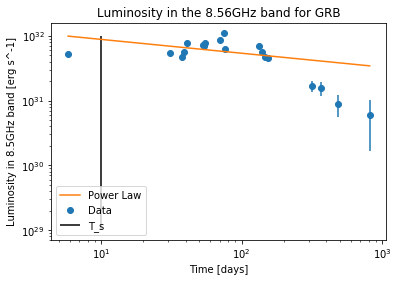

In [106]:
"""
TEST BOX FOR TESTING FUNCTIONS
"""

# data

lum = [5.229425733571293e+31, 5.406995367987975e+31, 4.687838348600413e+31, 5.5579295572421555e+31, 7.724279097125679e+31, 7.129420821829794e+31, 6.880823333646438e+31, 7.839699359496521e+31, 8.736426013300767e+31, 1.092053251662596e+32, 6.339235948675558e+31, 6.916337260529774e+31, 5.726620709938004e+31, 4.803258610971256e+31, 4.554661122787901e+31, 1.6869115269584818e+31, 1.5448558194251356e+31, 8.967266538042455e+30, 6.037367570167197e+30]
lum_err = [4.794380129250422e+30, 4.794380129250422e+30, 5.771013118542173e+30, 3.9953167743753515e+30, 4.261671226000374e+30, 5.41587384970881e+30, 2.130835613000187e+30, 3.1074686022919403e+30, 5.41587384970881e+30, 3.7289623227503284e+30, 3.7289623227503284e+30, 3.5513926883336453e+30, 3.6401775055419866e+30, 3.9953167743753515e+30, 3.817747139958669e+30, 3.285038236708622e+30, 3.817747139958669e+30, 3.4626078711253047e+30, 4.3504560432087153e+30]
time = [5.82, 30.89, 37.87, 38.85, 40.64, 52.79, 53.64, 54.77, 70.53, 74.66, 75.64, 133.16, 140.33, 146.34, 154.42, 317.02, 368.65, 488.54, 814.59]

T_s = 10

diff = []

for T in time:
    diff.append(abs(T-Ts))

idx1 = np.argmin(diff)

if idx1+1 == len(time):
    if time[idx1]<T_s:
        idx2 = idx1 
        idx1 = idx1 - 1
    if time[idx1]>T_s:
        idx2 = idx1 - 1

else:
    if time[idx1]<T_s:
        idx2 = idx1+1
    if time[idx1]>T_s:
        idx2 = idx1 -1


if time[idx1]>T_s:
        time_new = time[idx2:]
        lum_new = lum[idx2:]
        lum_err_new = lum_err[idx2:]

else:
    time_new = time[idx1:]
    lum_new = lum[idx1:]
    lum_err_new = lum_err[idx1:]

# calculating best fit parameters and covariances for the data lmfit

# call on weight function to get the weights of the luminosity errorss
weight_lum = weight(lum_err_new)

# making power law model for linear fits
model1 = PowerLawModel(prefix='pow_')

# make parameters with starting values
par1 = model1.make_params(pow_amplitude=1e31, pow_exponent=-0.5)

# create results for these parameters using the weights
result1 = model1.fit(lum_new, par1, x=time_new, weights=weight_lum)

# get a and N from the results
a1 = result1.best_values['pow_exponent']
N1 = result1.best_values['pow_amplitude']

# call on power law function to create line with these parameters
decay_line_all = power_law1(time, N1, a1)


print(min(lum))
print(max(lum))



# plot scatter graph of the individual luminosity curves
plt.title(f'Luminosity in the 8.56GHz band for GRB')
plt.xscale("log")
plt.xlabel("Time [days]")
plt.yscale("log")
plt.ylabel("Luminosity in 8.5GHz band [erg s^-1]")
plt.scatter(time, lum, label = 'Data')
plt.errorbar(time, lum, yerr = lum_err, fmt = ' ')
# plot the decay line
plt.plot(time, decay_line_all, label = 'Power Law')
# plot T_s
plt.vlines(x=10, ymin=1e29, ymax=1e32, colors='black', linestyles='solid', label='T_s')
plt.legend()
plt.show()

In [10]:
"""
REDSHIFTS
"""

# open afterglow data
with open("Radio_data.txt") as file_1:
    # splits data into lines
    data_1 = file_1.readlines()

names = []
GRB_sample = []         # names of all GRBs in sample

# generate list of GRBs in sample
for i in data_1:
    
    # splits data into rows
    row = i.split()
    names.append(row[0])

for GRB in names:
    if GRB not in GRB_sample:
        GRB_sample.append(GRB)
         
# open redshift data

GRB_redshift=[]
Redshift= []        # all redshifts
sample= []
z_sample = []       # redshifts in sample

with open('Redshifts.txt') as fp:

    for line in fp.readlines():
        row=line.split()
        
        try:
            if float(row[-1]) <10:
                
                z = float(row[-1])
                GRB_redshift.append([row[0], z])     # all GRBs with redshift
                Redshift.append(z)
                
        except:
            pass   


GRB_z = [item for item in GRB_redshift if item[0] in GRB_sample]


z_all = []          # redshifts of GRBs in sample
GRB_all = []        # GRBs in sample with redshifts

for data in GRB_z:
    z_all.append(data[1])
    GRB_all.append(data[0])

In [11]:
"""
LUMINOSITY DISTANCE
"""

# Define constants
H0 = 70         # Hubble parameter
WM = 0.3        # Omega(matter)
WV = 0.7        # Omega(Vaccuum)
WR = 0.         # Omega(radiation)
WK = 0.         # Omega curvaturve = 1-Omega(total)
c = 299792.458  # velocity of light in km/sec
Tyr = 977.8     # coefficent for converting 1/H into Gyr
DTT = 0.5       # time from z to now in units of 1/H0
age = 0.5       # age of Universe in units of 1/H0
zage = 0.1      # age of Universe at redshift z in units of 1/H0
a = 1.0         # 1/(1+z), the scale factor of the Universe
az = 0.5        # 1/(1+z(object))
h = H0/100.
WR = 4.165E-5/(h*h)   # includes 3 massless neutrino species, T0 = 2.72528
WK = 1-WM-WR-WV
age = 0.
n=1000         # number of points in integrals

# empty list for data
d_l_all = []        # all luminosity distances

for z in z_all:

    az = 1.0/(1+1.0*z)
    
    for i in range(n):
        a = az*(i+0.5)/n
        adot = np.sqrt(WK+(WM/a)+(WR/(a*a))+(WV*a*a))
        age = age + 1./adot

    zage = az*age/n
    zage_Gyr = (Tyr/H0)*zage
    DTT = 0.0
    DCMR = 0.0

    # do integral over a=1/(1+z) from az to 1 in n steps, midpoint rule
    for i in range(n):
        a = az+(1-az)*(i+0.5)/n
        adot = np.sqrt(WK+(WM/a)+(WR/(a*a))+(WV*a*a))
        DTT = DTT + 1./adot
        DCMR = DCMR + 1./(a*adot)

    DTT = (1.-az)*DTT/n
    DCMR = (1.-az)*DCMR/n
    age = DTT+zage
    age_Gyr = age*(Tyr/H0)
    DTT_Gyr = (Tyr/H0)*DTT
    DCMR_Gyr = (Tyr/H0)*DCMR
    DCMR_Mpc = (c/H0)*DCMR

    # tangential comoving distance

    ratio = 1.00
    x = np.sqrt(abs(WK))*DCMR
    if x > 0.1:
        if WK > 0:
            ratio =  0.5*(np.exp(x)-np.exp(-x))/x 
        else:
            ratio = np.sin(x)/x
    else:
        y = x*x
        if WK < 0: y = -y
        ratio = 1. + y/6. + y*y/120.
        DCMT = ratio*DCMR
        DA = az*DCMT
        DA_Mpc = (c/H0)*DA
        kpc_DA = DA_Mpc/206.264806
        DA_Gyr = (Tyr/H0)*DA
        DL = DA/(az*az)
        DL_Mpc = (c/H0)*DL

    # luminosuity distance in cm
    d_l = DL_Mpc * 3.08568e24
    
    d_l_all.append(d_l)

GRB_z_d_l = []      # GRB name with corresponding redshift and lum distance

for name, z, d_l in zip(GRB_all, z_all, d_l_all):
    GRB_z_d_l.append([name, z, d_l])

In [12]:
"""
DATA FOR FREQUENCY RANGE
"""

# empty array to hold data
GRB_name = []
time_array = []
flux_array = []
flux_err_array = []
data_freq_all = []
data_freq = []
  


# split data by GRB
for i in data_1[1:]:
    
    # splits data into rows
    row = i.split()
    freq = float(row[6])
    
    # gets only data points for in required range
    if freq < 8.8:
        
        if freq > 8.2:
            
            # add all data to required array
            GRB_name.append(row[0])
            time_array.append(float(row[5]))
            flux_array.append(float(row[7]))
            flux_err_array.append(float(row[8]))
            data_freq_all.append([row[0], float(row[5]), float(row[7]), float(row[8]), freq])

            # checks whether there is a flux and an error for the data point
            for item in data_freq_all:

                item[1:] = [x for x in item[1:] if x > 0]

            if len(item)>3:
                data_freq.append(item)
                

In [13]:
"""
DATA FOR SPECIFIC FREQUENCY
"""

# empty array to hold data for 8.46GHz
GRB_name = []
time_array = []
flux_array = []
flux_err_array = []
data_freq_all = []



# split data by GRB
for i in data_1:
    
    # splits data into rows
    row = i.split()
    freq = row[6]
    
    # Gets only data points for 8.46GHz
    if freq == '8.46':
        
        GRB_name.append(row[0])
        time_array.append(float(row[5]))
        flux_array.append(float(row[7]))
        flux_err_array.append(float(row[8]))
        data_freq_all.append([row[0], float(row[5]), float(row[7]), float(row[8])])
        
    else:
        continue


data_freq = []

for item in data_freq_all:
    
    item[1:] = [x for x in item[1:] if x > 0]
    
    if len(item)>3:
        data_freq.append(item)

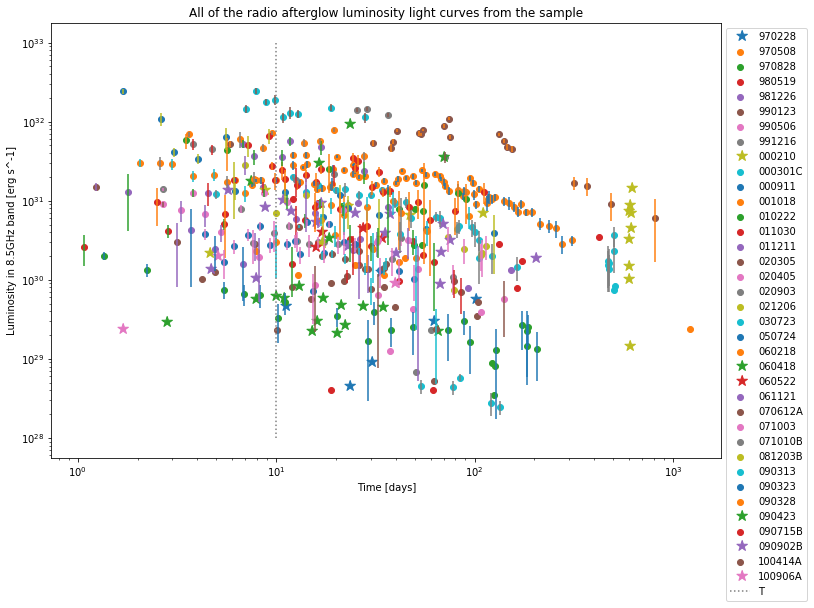

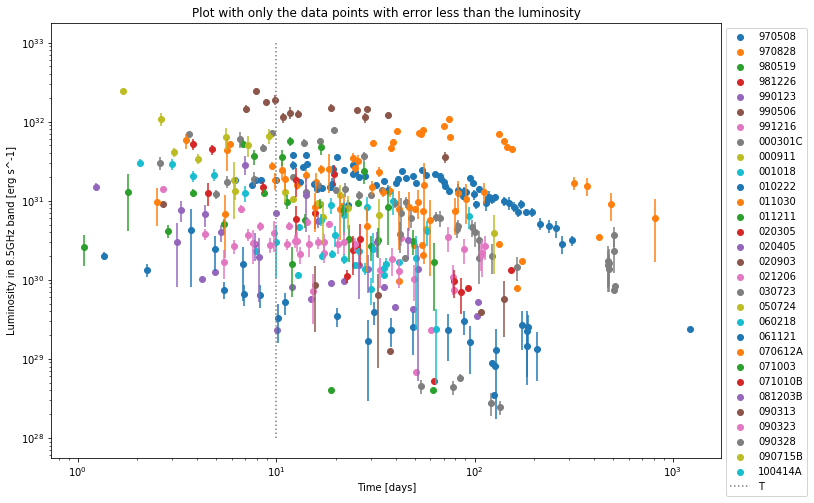

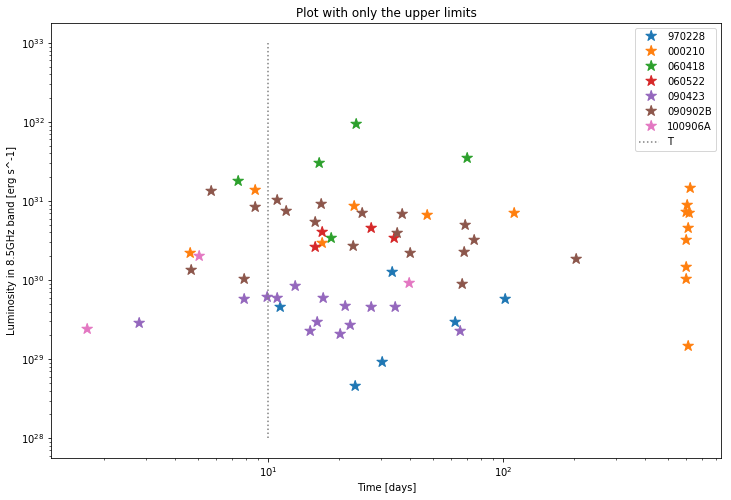

In [108]:
"""
PLOT OF ALL DATA FOR 8.46GHz
"""

# first GRB in the radio data with a redshift
first_GRB =  GRB_name[0] 

# empty arrays to store data
time = []
flux = []
flux_err = []
GRB_plot = []
GRB_plot_f = []
time_all = []
lum_all = []
lum_err_all = []
GRB_all = []
data_all = []

# loop through rows in data for 8.46GHz
for row in data_freq:
    
    # get name of GRB for that row
    GRB = row[0]
    
    # if GRB matches previous, add it to the array
    if re.match(GRB, first_GRB):
        
        # removes points where error is larger than the recorded value
        #if row[2] > row[3]:
            
        # Adds data to array for that GRB
        time.append(row[1])
        flux.append(row[2])
        flux_err.append(row[3])

    
    # when it stops matching, plot the data and reset the arrays  
    else:
        
        if len(flux) >= 3:
            
            # identify redshift and luminosity distance for that GRB
            for j in GRB_z_d_l:
                
                x = j[0]
                
                if re.match(GRB, x):
                    
                    z = j[1]
                    d_l = j[2]
                    
                    # call on luminosity function to plot lum curves
                    lum = L(flux, d_l, z, beta)
                    lum_err = L_err(flux_err, d_l, z, beta)
                    
                    lum_all.append(lum)
                    lum_err_all.append(lum_err)
                    time_all.append(time)
                    GRB_all.append(first_GRB)
                    data_all.append([first_GRB, lum, lum_err, time])
                    
        # reset the arrays
        time = []
        flux = []
        flux_err = []
        
        # move to next GRB
        first_GRB = GRB
        continue
        
# plot scatter graph of all data points
plt.figure(figsize = (12, 8))
plt.title('All of the radio afterglow luminosity light curves from the sample')
plt.xscale("log")
plt.xlabel("Time [days]")
plt.yscale("log")
plt.ylabel("Luminosity in 8.5GHz band [erg s^-1]")

# loop through data and plot each GRB onto the plot
for x in data_all:
    
    # plot point with error bar if error is less than luminosity
    if x[1]>x[2]:
        
        plt.scatter(x[3], x[1], label = f'{x[0]}')
        plt.errorbar(x[3], x[1], yerr = x[2], fmt = ' ')
    
    # plot point as a star if error is more than luminosity
    if x[1]<x[2]:
        
        plt.scatter(x[3], x[1], s=200, marker=r'$\star$', label = f'{x[0]}')

# plot a vertical line to mark on the early time at which luminosity will be taken
plt.vlines(x=10, ymin=1e28, ymax=1e33, colors='grey', linestyles=':', label='T')
plt.legend(bbox_to_anchor = (1 , 1))
plt.show()



# plot scatter graph of data points where error is less than luminosity
plt.figure(figsize = (12, 8))
plt.title('Plot with only the data points with error less than the luminosity')
plt.xscale("log")
plt.xlabel("Time [days]")
plt.yscale("log")
plt.ylabel("Luminosity in 8.5GHz band [erg s^-1]")

# loop through data and plot each GRB onto the plot
for x in data_all:
    
    # plot point with error bar if error is less than luminosity
    if x[1]>x[2]:
        
        plt.scatter(x[3], x[1], label = f'{x[0]}')
        plt.errorbar(x[3], x[1], yerr = x[2], fmt = ' ')

# plot a vertical line to mark on the early time at which luminosity will be taken
plt.vlines(x=10, ymin=1e28, ymax=1e33, colors='grey', linestyles=':', label='T')
plt.legend(bbox_to_anchor = (1 , 1))
plt.show()



# plot scatter graph of data points where error is more than luminosity
plt.figure(figsize = (12, 8))
plt.title('Plot with only the upper limits')
plt.xscale("log")
plt.xlabel("Time [days]")
plt.yscale("log")
plt.ylabel("Luminosity in 8.5GHz band [erg s^-1]")

# loop through data and plot each GRB onto the plot
for x in data_all:
    
    # plot point as a star if error is more than luminosity
    if x[1]<x[2]:
        
        plt.scatter(x[3], x[1], s=200, marker=r'$\star$', label = f'{x[0]}')

# plot a vertical line to mark on the early time at which luminosity will be taken
plt.vlines(x=10, ymin=1e28, ymax=1e33, colors='grey', linestyles=':', label='T')
plt.legend(bbox_to_anchor = (1 , 1))
plt.show()

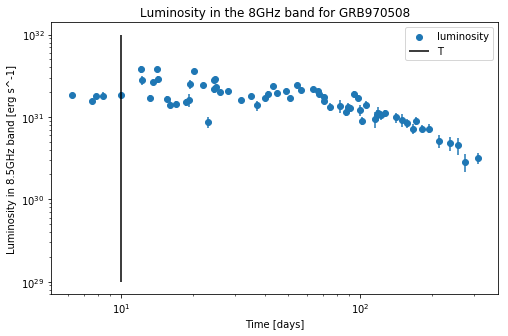

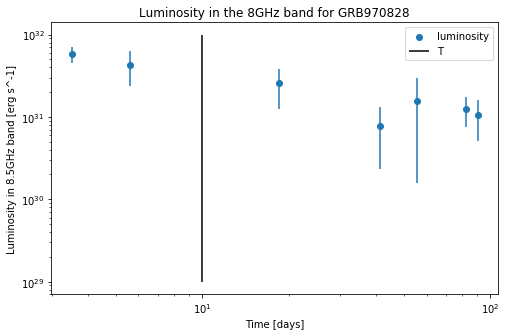

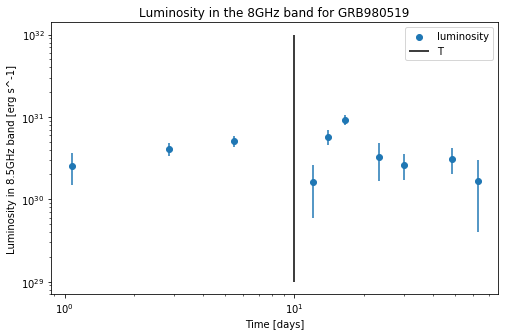

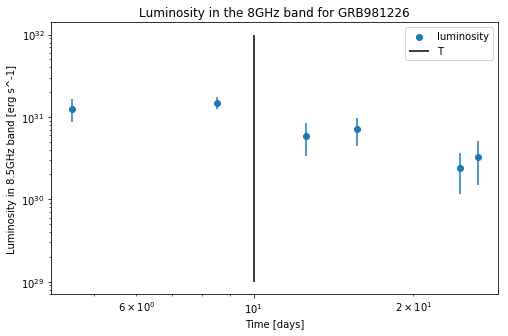

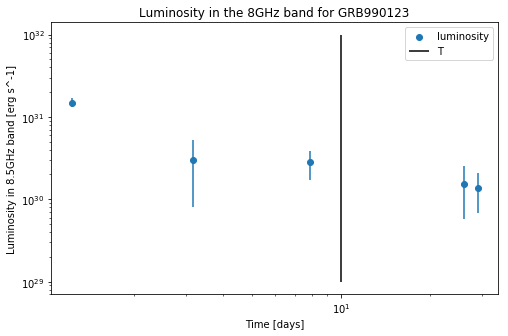

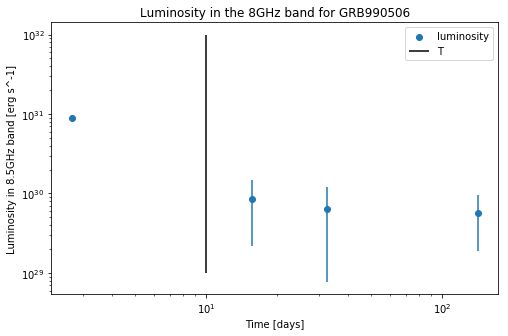

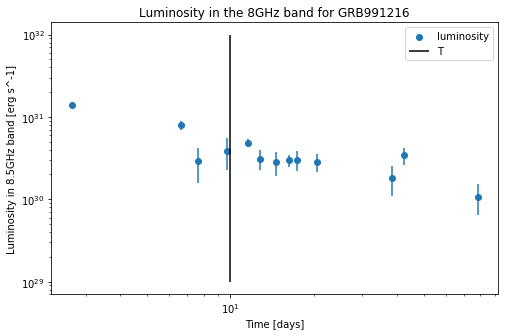

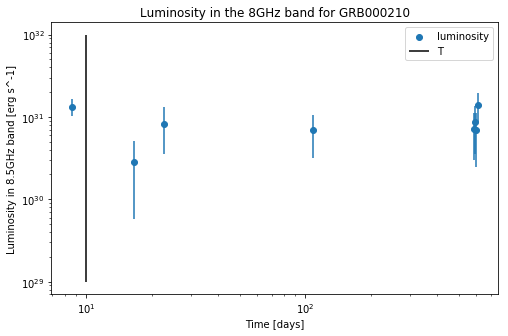

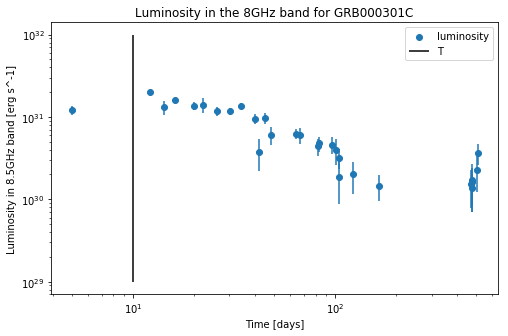

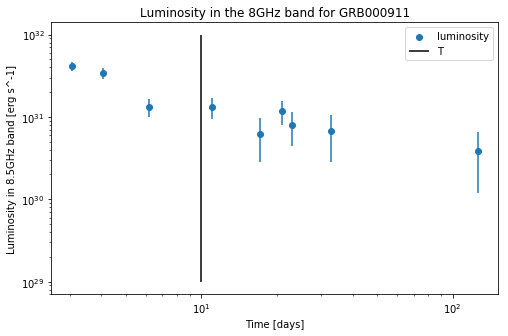

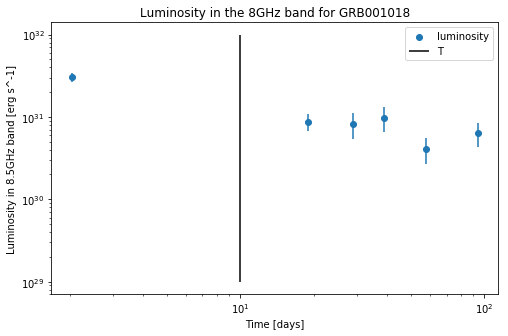

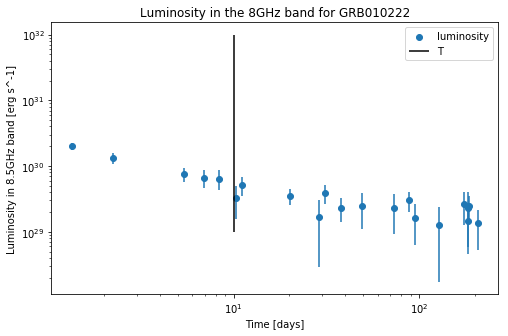

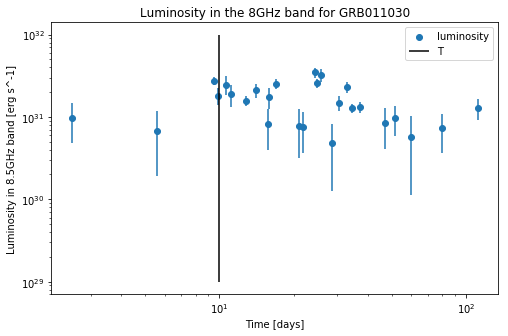

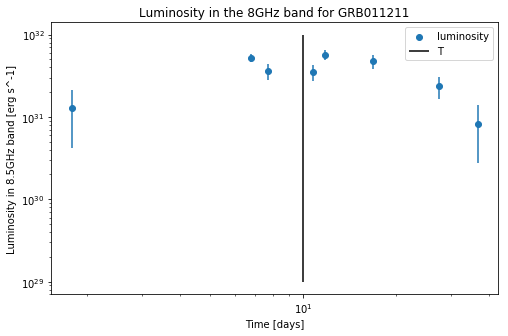

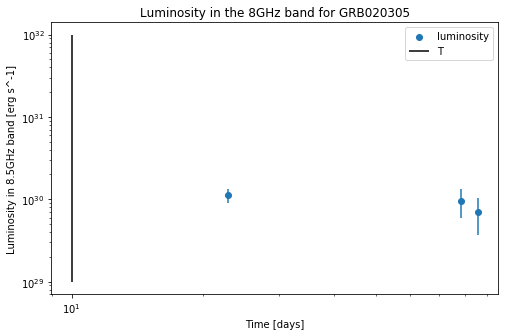

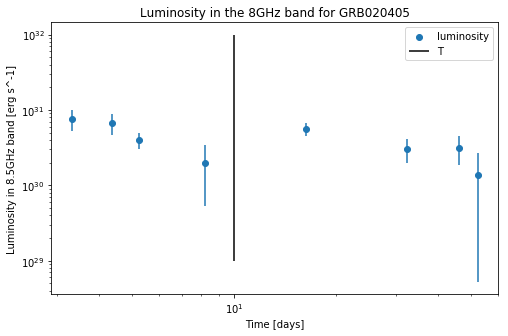

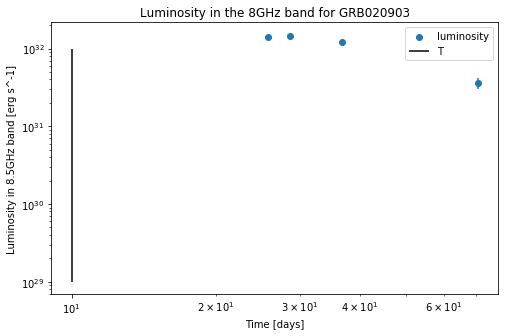

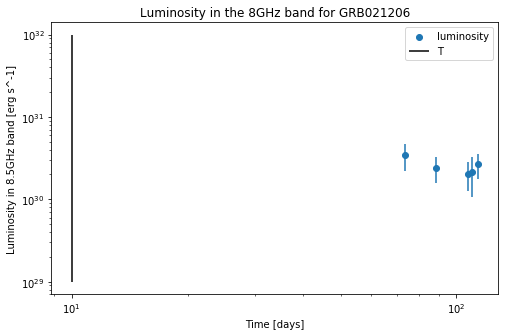

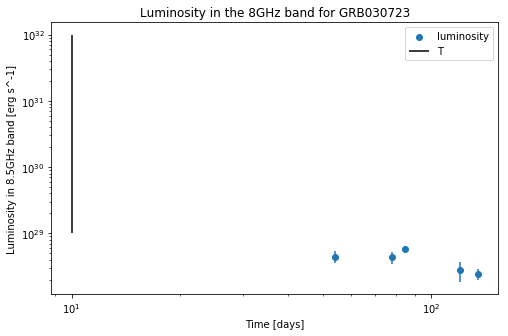

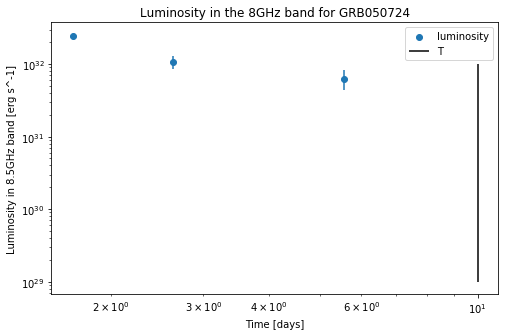

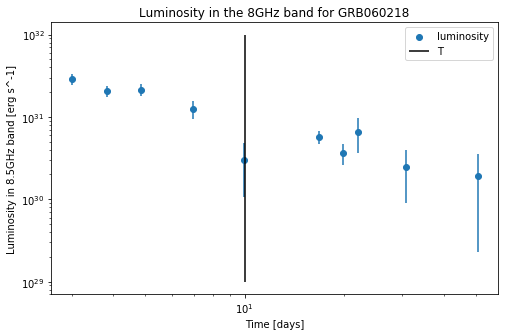

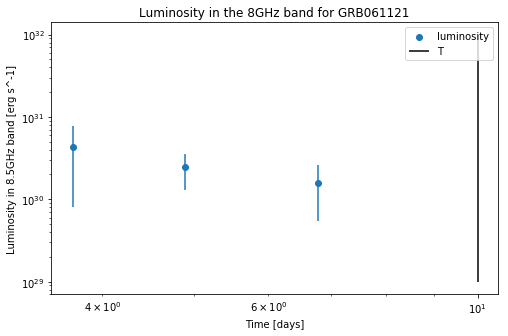

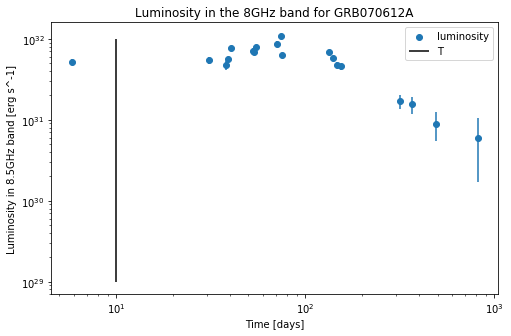

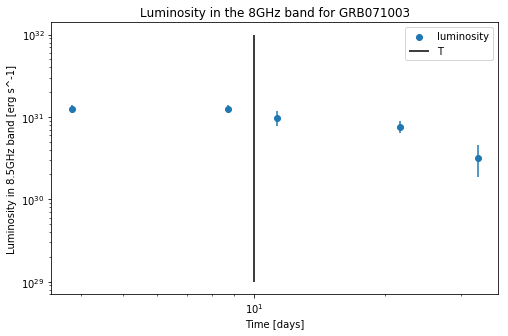

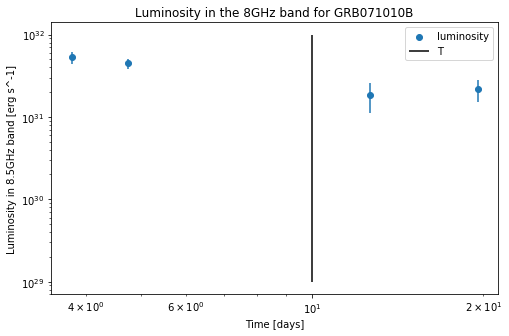

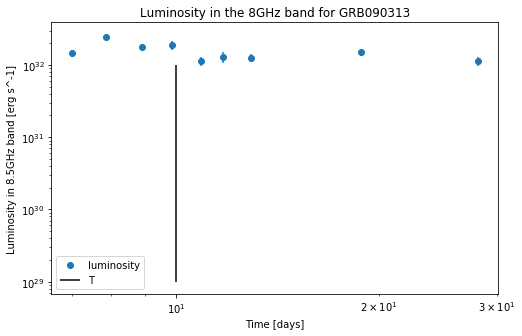

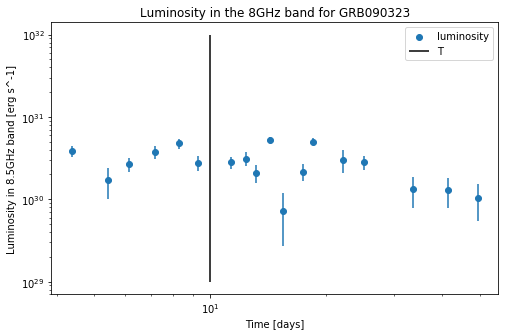

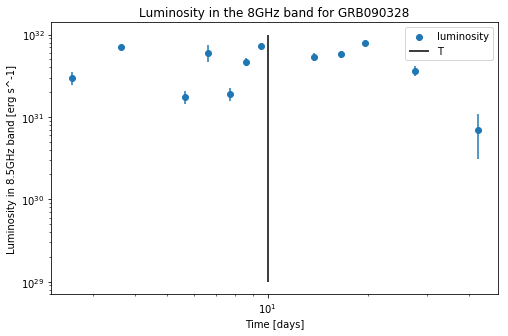

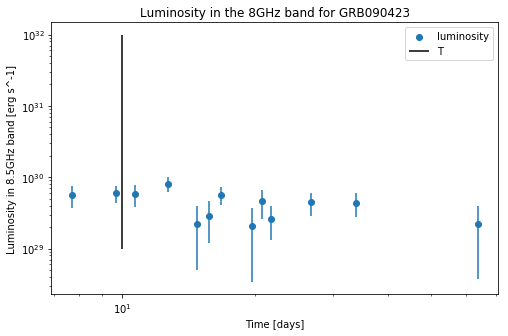

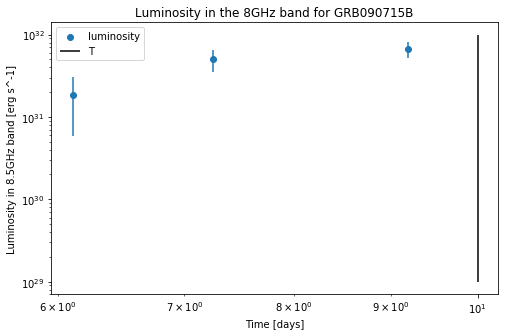

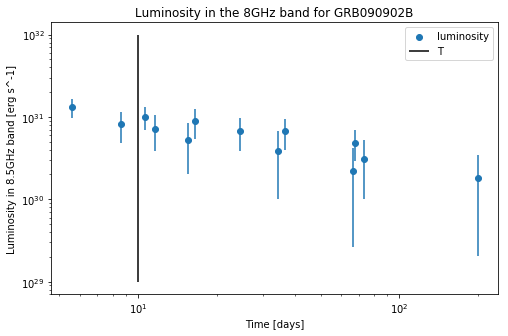

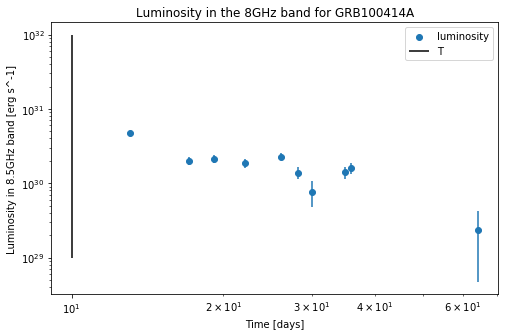

32


In [18]:
"""
FLUX AND LUMINOSITY CURVES (8GHz)
"""

# first GRB in the radio data with a redshift
first_GRB =  GRB_name[0] 

# empty arrays to store data
time = []
flux = []
flux_err = []
GRB_plot = []
GRB_plot_f = []
time_all = []
lum_all = []
lum_err_all = []
data_all = []

# loop through rows in data for 8GHz
for row in data_freq:
    
    # get name of GRB for that row
    GRB = row[0]
    
    # if GRB matches previous, add it to the array
    if re.match(GRB, first_GRB):
        
        # removes points where error is larger than the recorded value
        if row[2] > row[3]:
            
            # Adds data to array for that GRB
            time.append(row[1])
            flux.append(row[2])
            flux_err.append(row[3])

    
    # when it stops matching, plot the data and reset the arrays  
    else:
        
        if len(flux) >= 3:
            
            """
            # plot scatter graph of the individual flux curves
            f = plt.figure()
            f.set_figwidth(8) 
            f.set_figheight(5)
            plt.title(f'Flux in the 8GHz band for GRB{first_GRB}')
            plt.scatter(time, flux, label=flux)
            plt.errorbar(time, flux, yerr = flux_err, fmt = ' ')
            plt.xscale("log")
            plt.xlabel("Time [days]")
            plt.yscale("log")
            plt.ylabel(r'Flux in 8.5GHz band [$\mu$Jy]')
            plt.legend()
            plt.show()
            """
            
            #print(flux)
            #print(flux_err)
            
            # adds GRB to list if flux curve is plot
            GRB_plot_f.append(first_GRB)
            
            # identify redshift and luminosity distance for that GRB
            for j in GRB_z_d_l:
                
                x = j[0]
                
                if re.match(GRB, x):
                    
                    z = j[1]
                    d_l = j[2]
                    
                    # call on luminosity function to plot lum curves
                    lum = L(flux, d_l, z, beta)
                    lum_err = L_err(flux_err, d_l, z, beta)
                    
                    
                    # plot scatter graph of the individual luminosity curves
                    f = plt.figure()
                    f.set_figwidth(8) 
                    f.set_figheight(5)
                    plt.title(f'Luminosity in the 8.46GHz band for GRB{first_GRB}')
                    plt.scatter(time, lum, label='data')
                    plt.errorbar(time, lum, yerr = lum_err, fmt = ' ')
                    plt.xscale("log")
                    plt.xlabel("Time [days]")
                    plt.yscale("log")
                    plt.ylabel("Luminosity in 8.46GHz band [erg s^-1]")
                    plt.vlines(x=10, ymin=1e29, ymax=1e32, colors='black', linestyles='solid', label='T_s')
                    plt.legend()
                    plt.show()
                    
                    #print(lum)
                    #print(lum_err)
                    #print(time)
                    
                    # adds GRB to list if luminosity curve is plot
                    GRB_plot.append(first_GRB)
                    
        # reset the arrays
        time = []
        flux = []
        flux_err = []
        
        # move to next GRB
        first_GRB = GRB
        continue

print(len(GRB_plot))

In [16]:
"""
NO. OF GRBS PLOT
"""

# empty lists
no_GRB = []

# names of all GRBs with 8GHz curve
for GRB in GRB_plot:
    if GRB not in no_GRB:
        no_GRB.append(GRB)

print("8GHz GRBs:")
print(no_GRB)

print("The number of GRBs with 8GHz lightcurves is", len(no_GRB))


8GHz GRBs:
['970508', '970828', '980519', '981226', '990123', '990506', '991216', '000210', '000301C', '000911', '001018', '010222', '011030', '011211', '020305', '020405', '020903', '021206', '030723', '050724', '060218', '061121', '070612A', '071003', '071010B', '090313', '090323', '090328', '090423', '090715B', '090902B', '100414A']
The number of GRBs with 8GHz lightcurves is 32


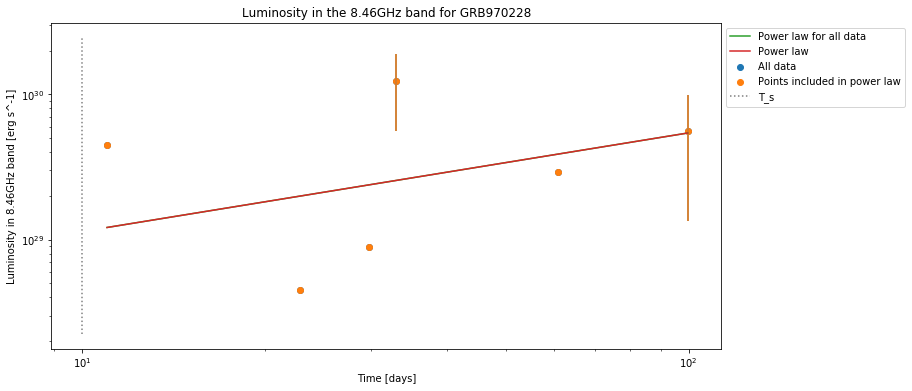

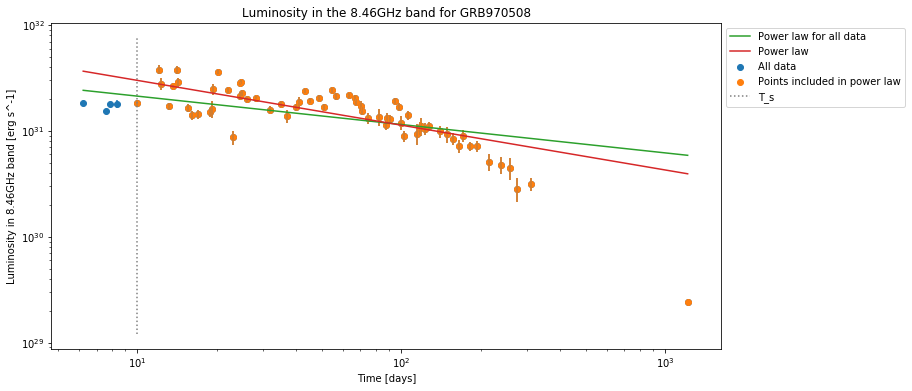

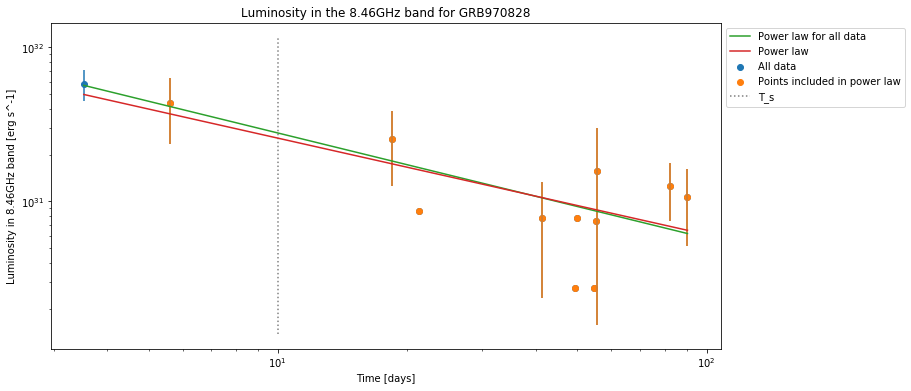

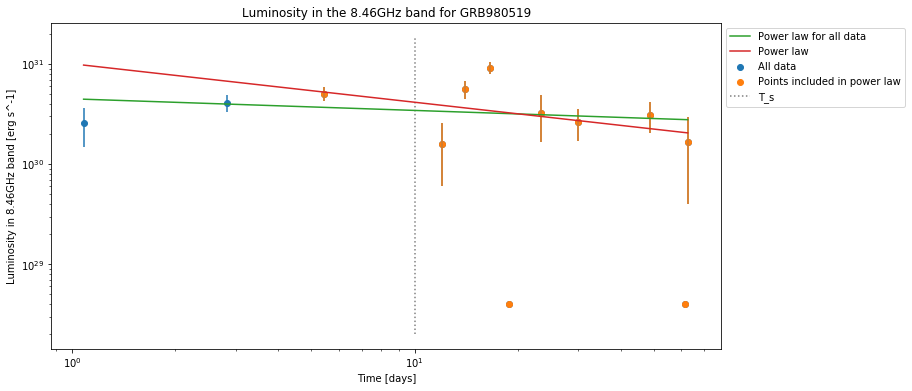

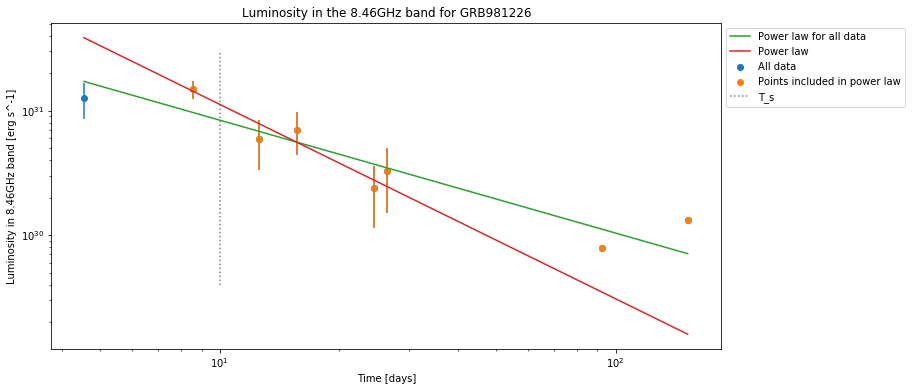

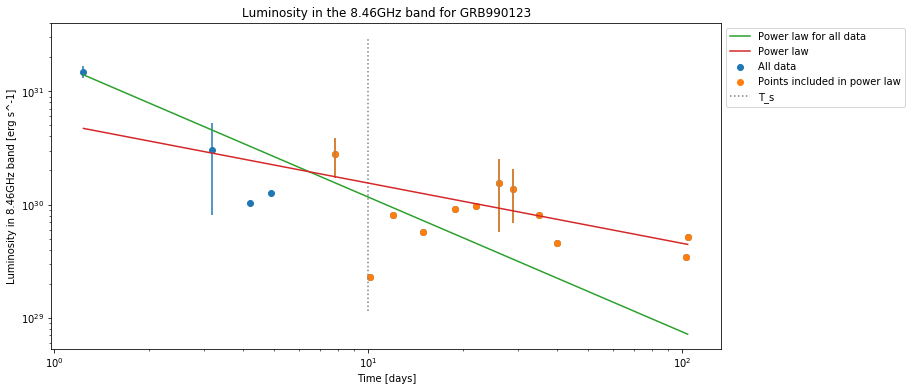

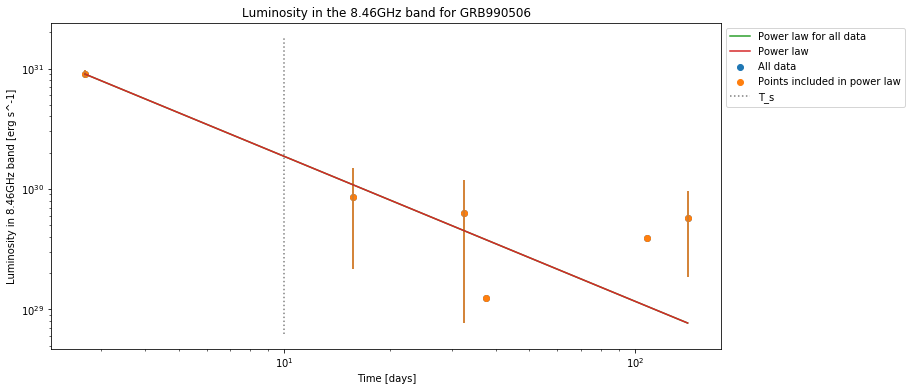

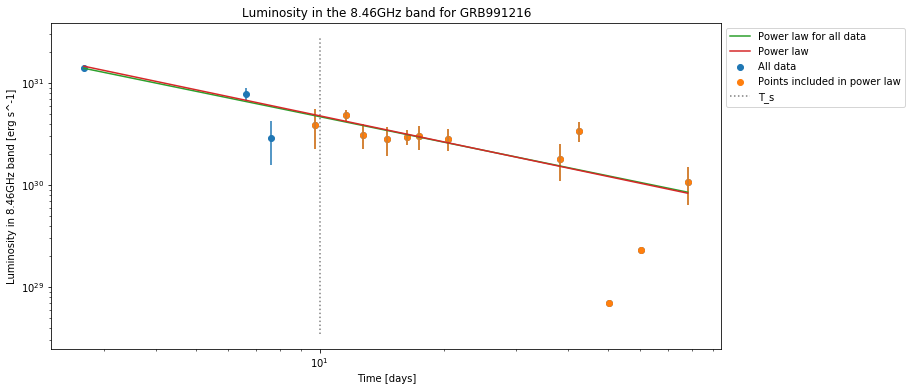

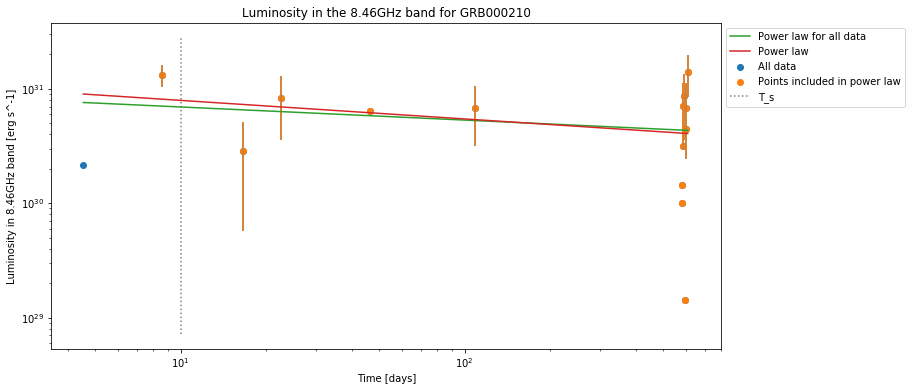

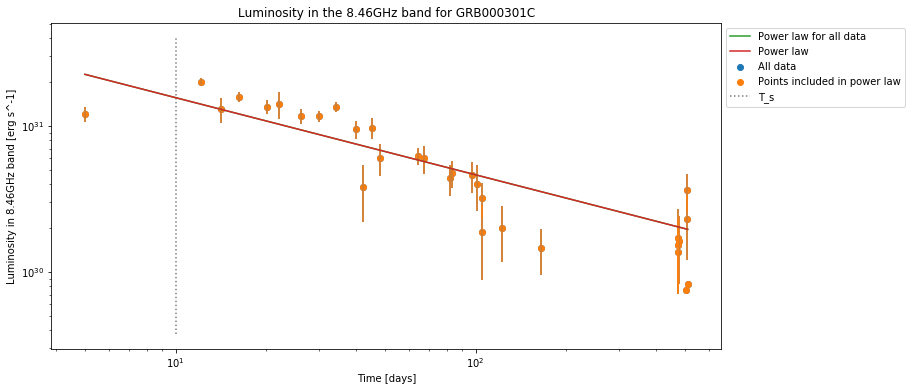

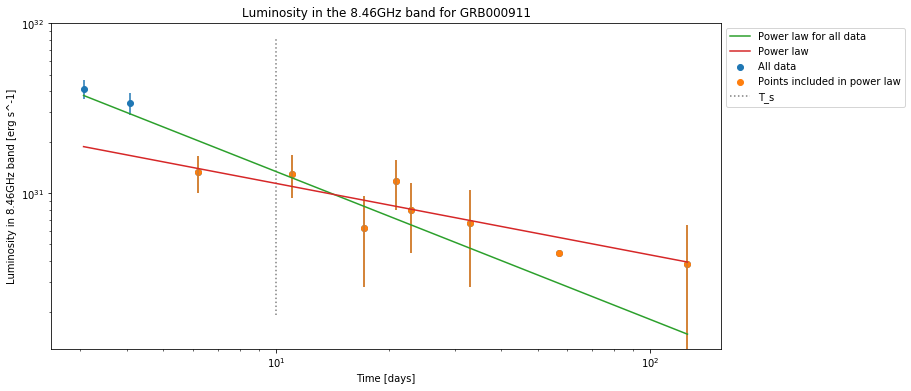

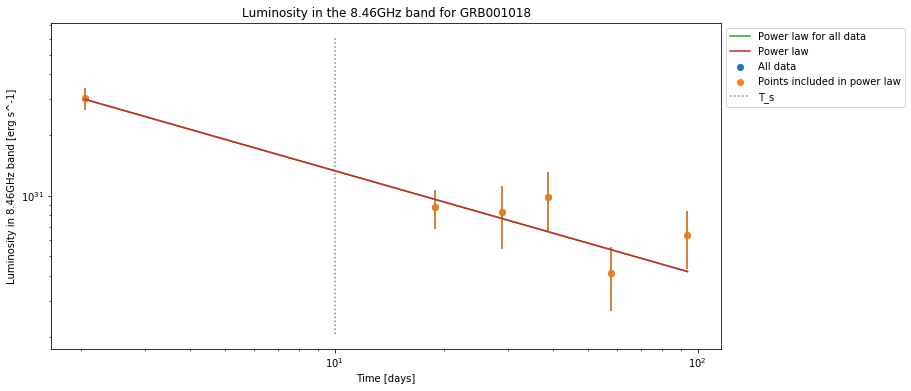

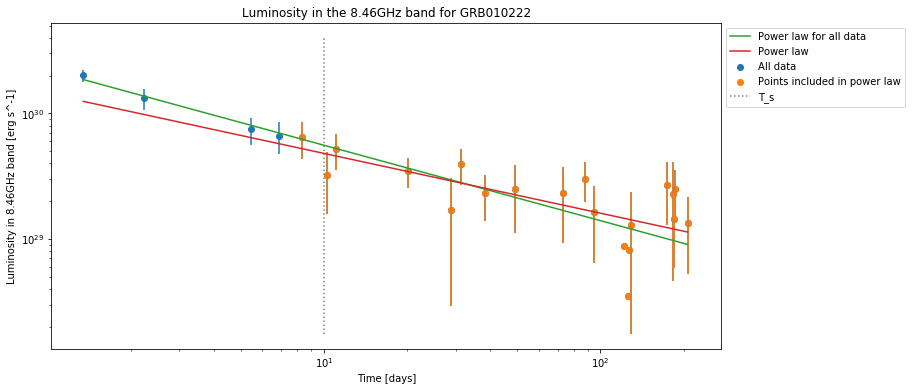

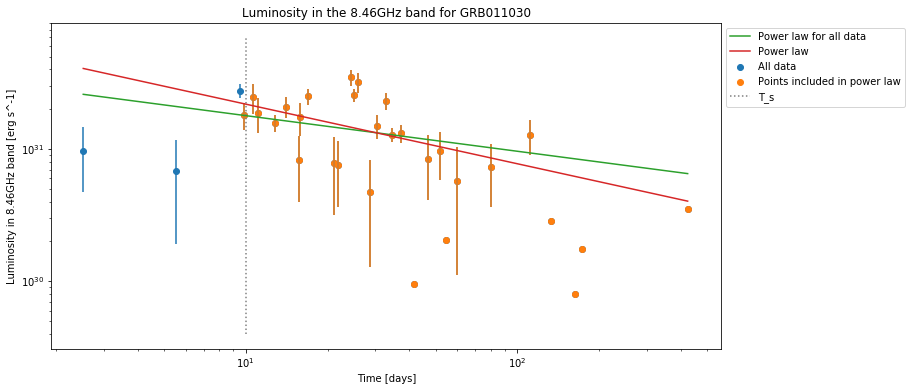

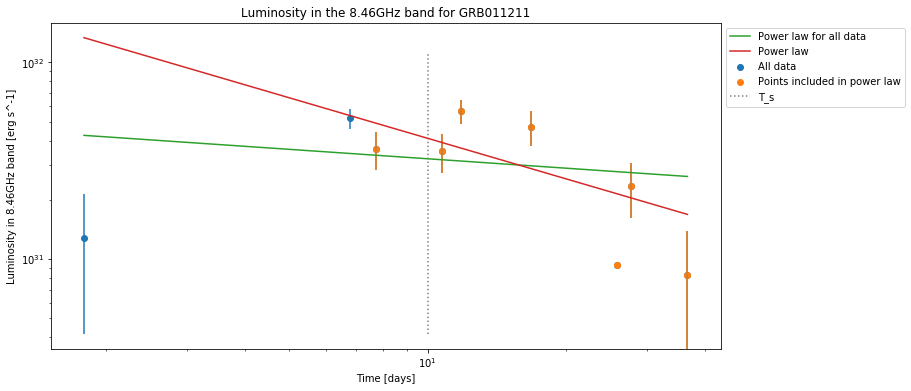

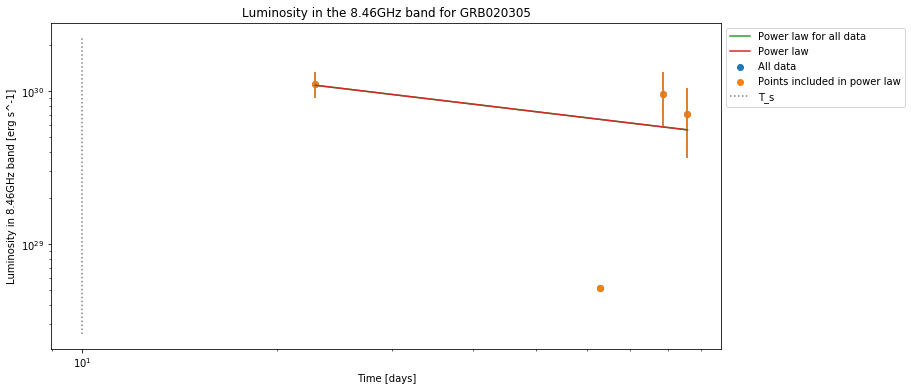

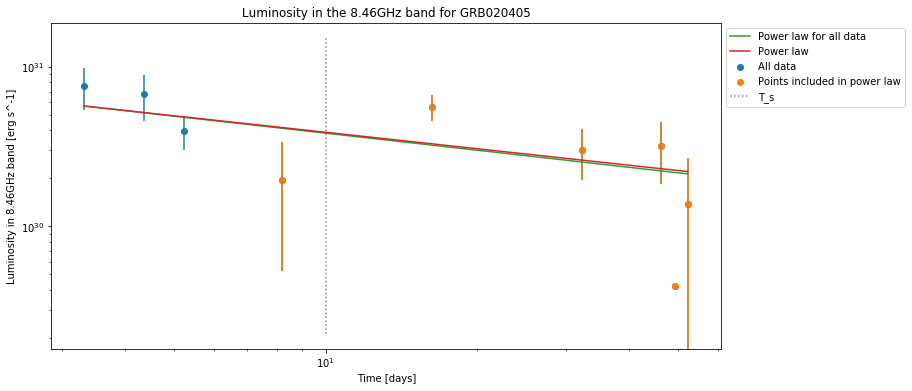

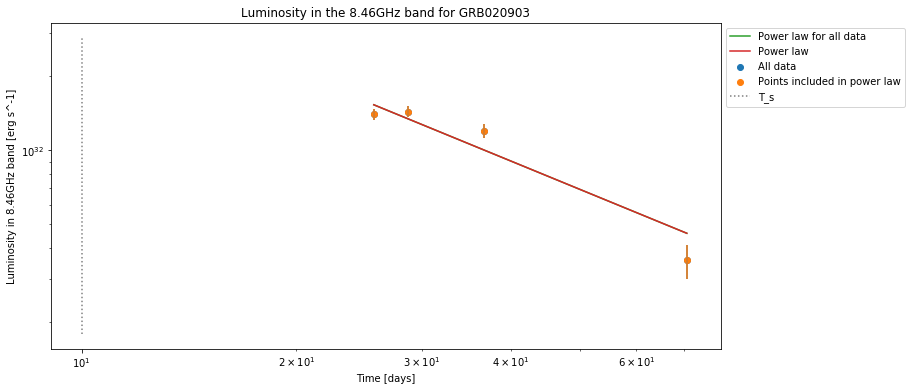

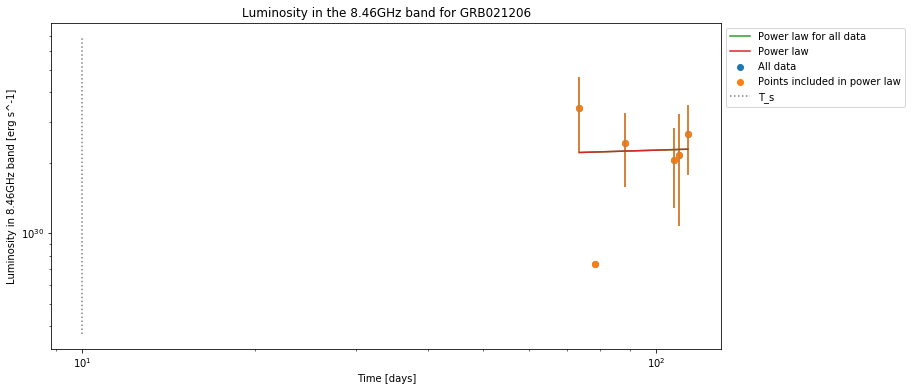

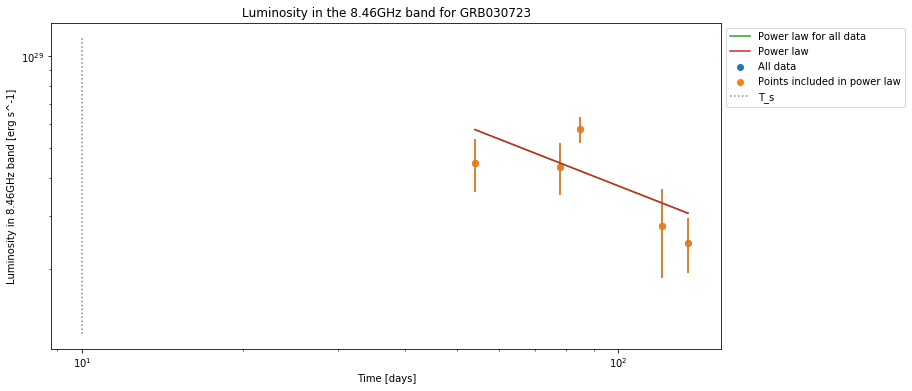

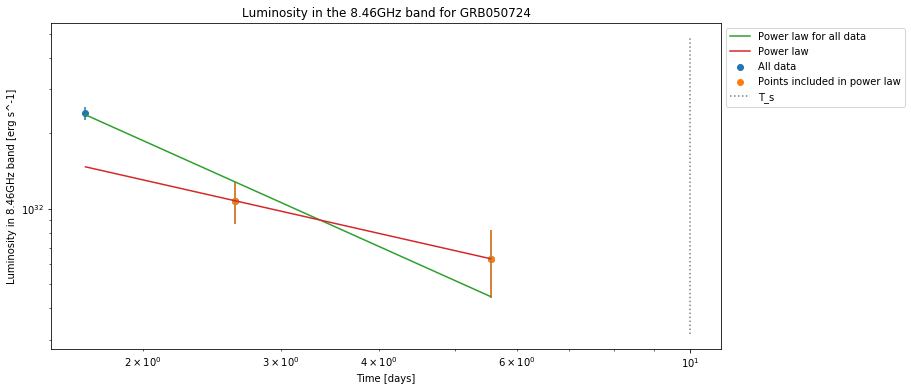

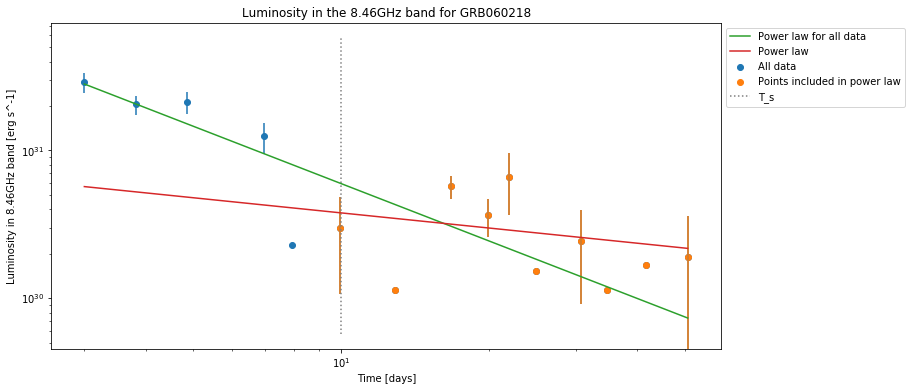

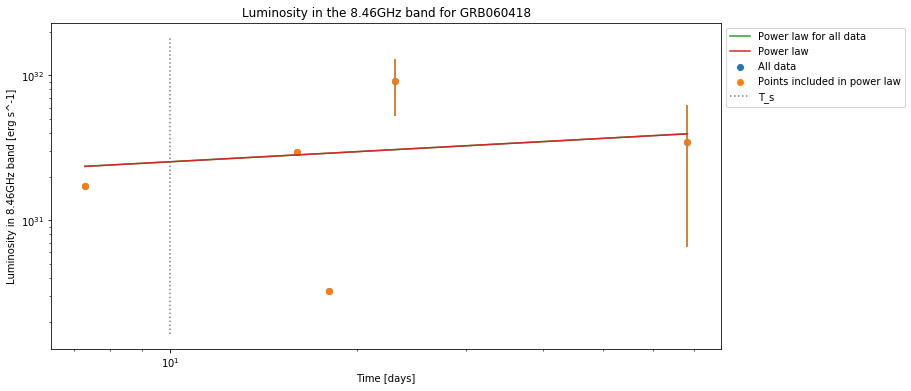

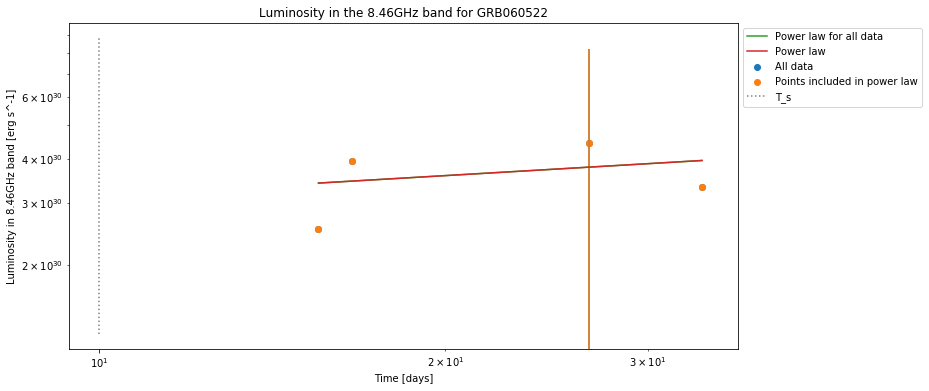

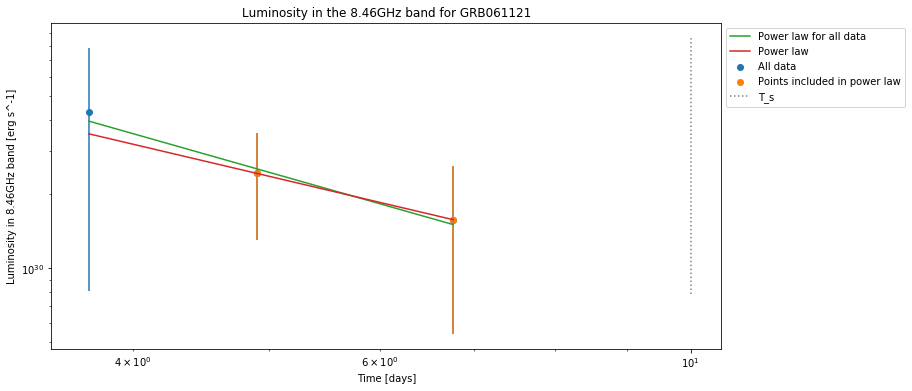

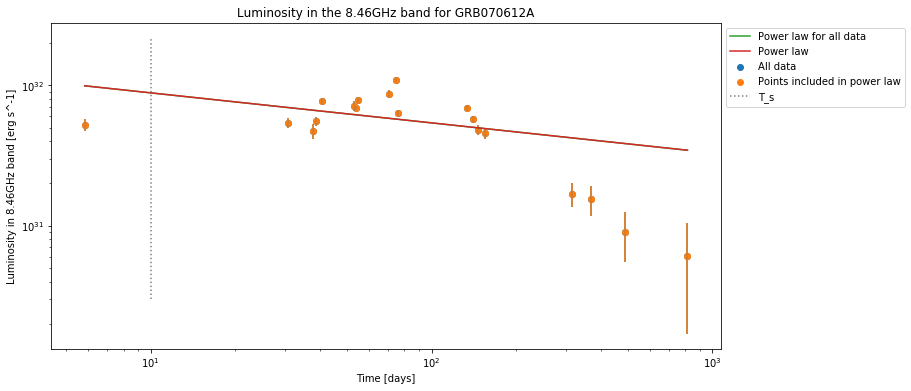

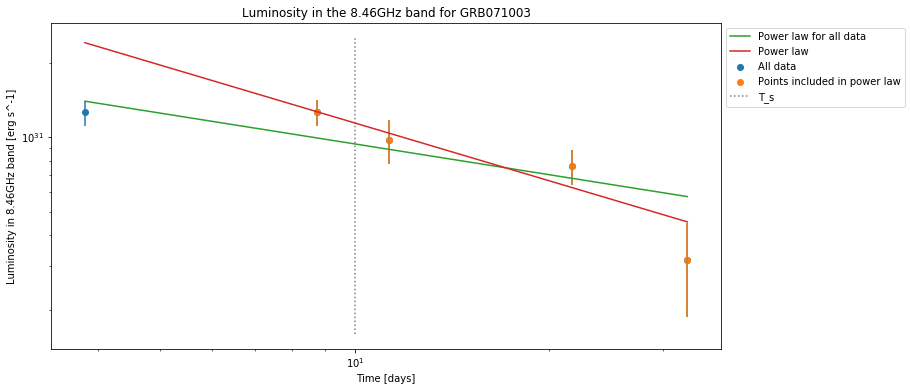

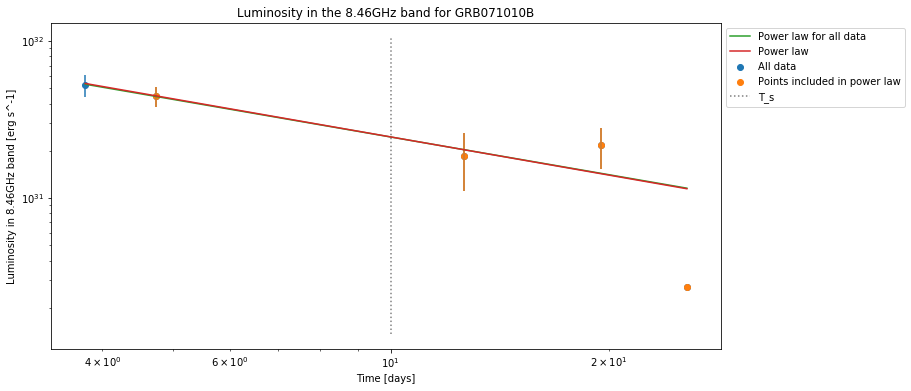

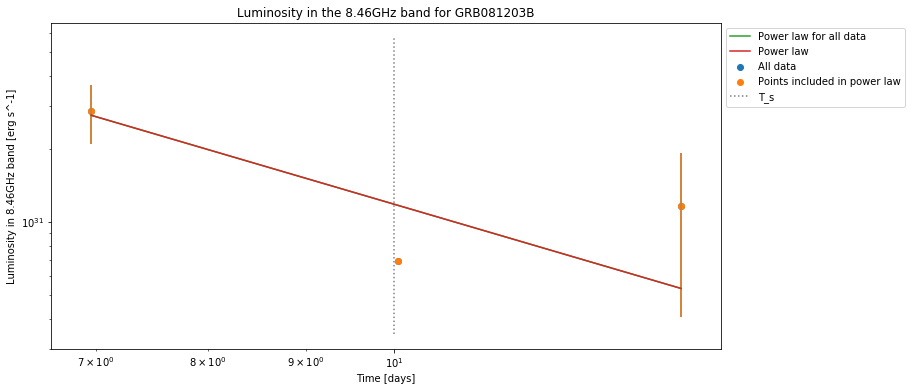

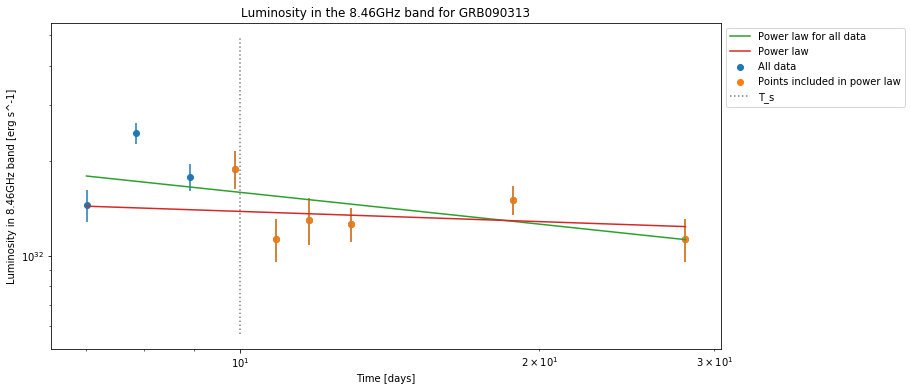

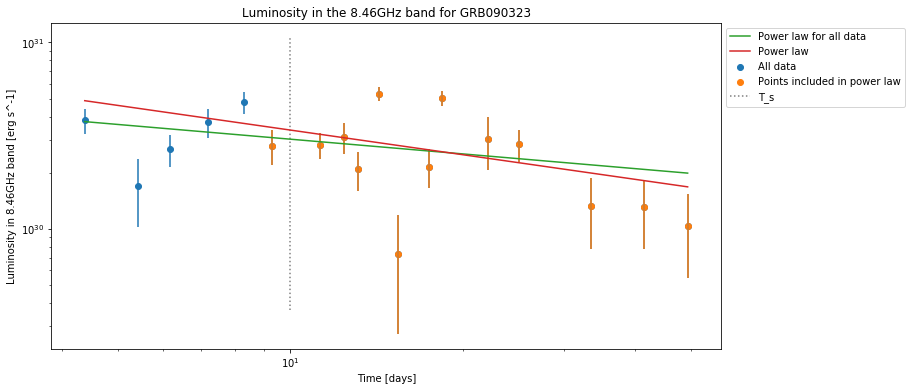

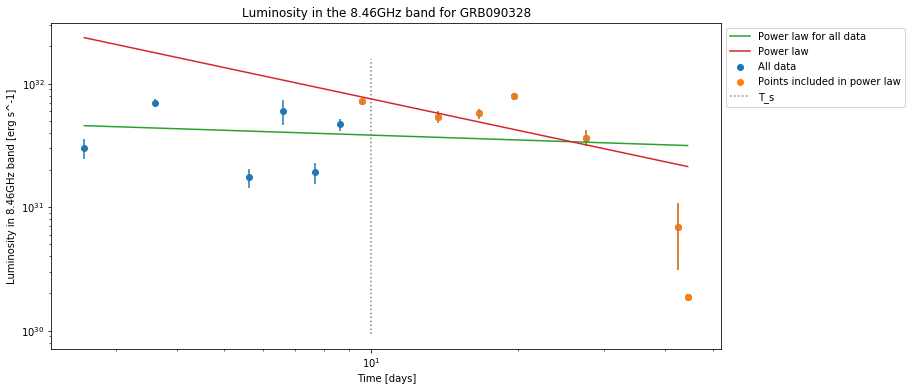

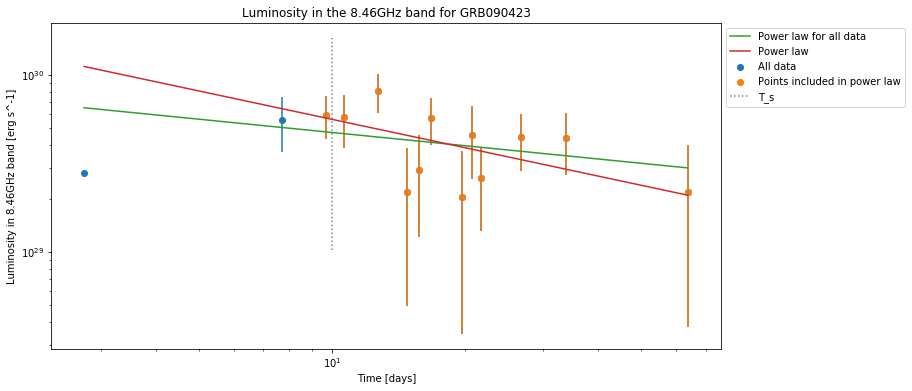

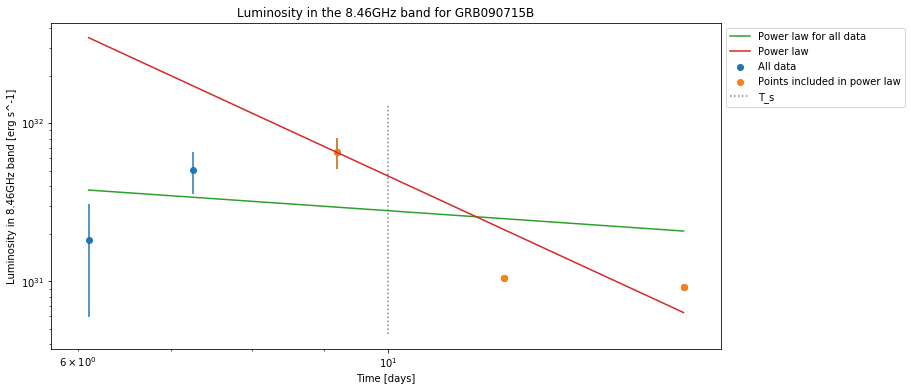

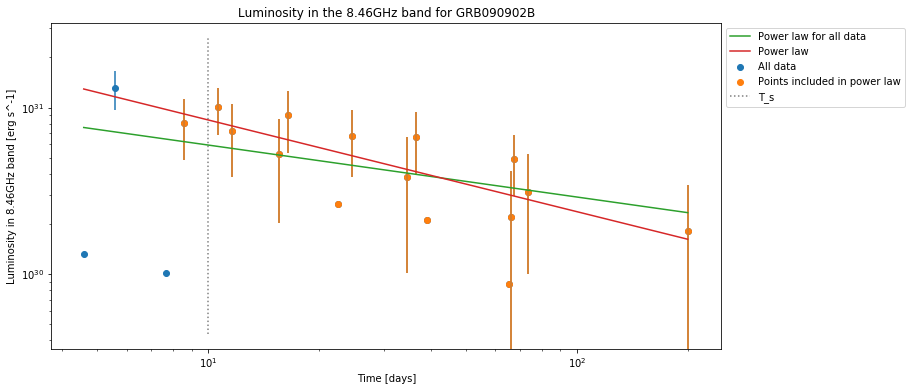

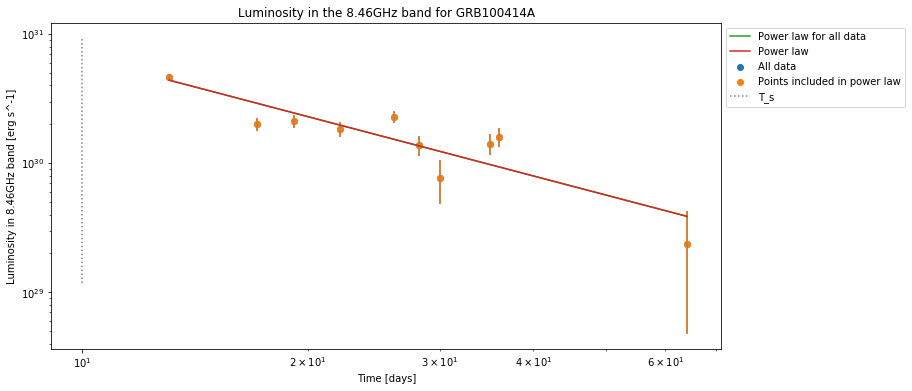

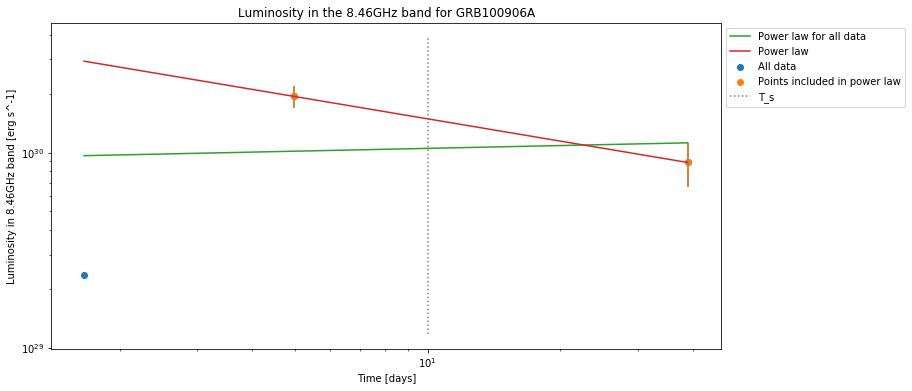

In [107]:
"""
PLOTTING POWER LAW OVER THE CURVES
"""

# define the early time as 10 days
T_s = 10

# first GRB in the radio data with a redshift
first_GRB =  GRB_name[0]

# empty arrays to store data
time = []
flux = []
flux_err = []
GRB_plot = []
GRB_plot_f = []
decay_constant = []

# loop through rows in data for 8.46GHz
for row in data_freq:
    
    # get name of GRB for that row
    GRB = row[0]
    
    # if GRB matches previous, add it to the array
    if re.match(GRB, first_GRB):
            
        # Adds data to array for that GRB
        time.append(row[1])
        flux.append(row[2])
        flux_err.append(row[3])

    # when it stops matching, plot the data and reset the arrays  
    else:
        
        if len(flux) >= 3:
            
            """
            # plot scatter graph of the individual flux curves
            fig = plt.subplot()
            plt.title(f'Flux in the 8.56GHz band for GRB{first_GRB}')
            plt.scatter(time, flux)
            plt.errorbar(time, flux, yerr = flux_err, fmt = ' ')
            plt.xscale("log")
            plt.xlabel("Time [days]")
            plt.yscale("log")
            plt.ylabel(r'Flux in 8.5GHz band [$\mu$Jy]')
            plt.show()
            """
            
            # Adds GRB to list if flux curve is plot
            GRB_plot_f.append(GRB)
            
            # identify redshift and luminosity distance for that GRB
            for j in GRB_z_d_l:
                
                x = j[0]
                
                if re.match(GRB, x):
                    
                    z = j[1]
                    d_l = j[2]
                    
                    # call on luminosity function to plot lum curves
                    lum = L(flux, d_l, z, beta)
                    lum_err = L_err(flux_err, d_l, z, beta)
                    
                    
                    
                    # calculating best fit parameters and covariances for all the data
                    
                    # call on weight function to get the weights of the luminosity errorss
                    weight_lum = weight(lum_err)

                    # making power law model for linear fits
                    model1 = PowerLawModel(prefix='pow_')

                    # make parameters with starting values
                    par1 = model1.make_params(pow_amplitude=1e31, pow_exponent=-0.5)

                    # create results for these parameters using the weights
                    result1 = model1.fit(lum, par1, x=time, weights=weight_lum)

                    # get a and N from the results
                    a1_all = result1.best_values['pow_exponent']
                    N1_all = result1.best_values['pow_amplitude']

                    # call on power law function to create line with these parameters
                    decay_line_all = power_law1(time, N1_all, a1_all)
                    
                    
                    
                    # calculate best fit parameters for data beyond T_s
                    
                    # empty array to store the differences between the time values and T_s
                    diff = []
                    
                    # enables code to move past GRBs with data beyond T_s
                    if time[0]<T_s:
                        
                        # get the magnitude of the difference between T and T_s for each point
                        for T in time:

                            diff.append(abs(T-T_s))

                        # get index of time with smallest difference
                        idx1 = np.argmin(diff)

                        if idx1+1 == len(time):

                            if time[idx1]<T_s:
                                idx2 = idx1 
                                idx1 = idx1 - 1

                            if time[idx1]>T_s:
                                idx2 = idx1 - 1

                        else:

                            if time[idx1]<T_s:
                                idx2 = idx1+1

                            if time[idx1]>T_s:
                                idx2 = idx1 -1

                        if time[idx1]>T_s:

                                time_new = time[idx2:]
                                lum_new = lum[idx2:]
                                lum_err_new = lum_err[idx2:]

                        else:

                            time_new = time[idx1:]
                            lum_new = lum[idx1:]
                            lum_err_new = lum_err[idx1:]
                    
                    
                    
                    # if data doesn't extend beyond T_s
                    if time[0]>T_s:
                        
                        time_new = time
                        lum_new = lum
                        lum_err_new = lum_err
    
    
    
                    # call on weight function to get the weights of the luminosity errorss
                    weight_lum_new = weight(lum_err_new)

                    # making power law model for linear fits
                    model1 = PowerLawModel(prefix='pow_')

                    # make parameters with starting values
                    par1 = model1.make_params(pow_amplitude=1e31, pow_exponent=-0.5)

                    # create results for these parameters using the weights
                    result1 = model1.fit(lum_new, par1, x=time_new, weights=weight_lum_new)

                    # get a and N from the results
                    a1 = result1.best_values['pow_exponent']
                    N1 = result1.best_values['pow_amplitude']

                    # call on power law function to create line with these parameters
                    decay_line = power_law1(time, N1, a1)
                
                
                
                    # defining min and max values for plotting of T_s line
                    ymin_T_s = 0.5*min(lum)
                    ymax_T_s = 2*max(lum)
                    
                    
                    
                    # plot scatter graph of the individual luminosity curves
                    plt.figure(figsize = (12, 6))
                    plt.title(f'Luminosity in the 8.46GHz band for GRB{first_GRB}')
                    plt.xscale("log")
                    plt.xlabel("Time [days]")
                    plt.yscale("log")
                    plt.ylabel("Luminosity in 8.46GHz band [erg s^-1]")
                    plt.scatter(time, lum, label='All data')
                    plt.errorbar(time, lum, yerr = lum_err, fmt = ' ')
                    plt.scatter(time_new, lum_new, label = 'Points included in power law')
                    plt.errorbar(time_new, lum_new, yerr = lum_err_new, fmt = ' ')
                    # plot the decay line for all data
                    plt.plot(time, decay_line_all, label='Power law for all data')
                    # plot the decay line for data beyond T_s
                    plt.plot(time, decay_line, label='Power law')
                    # plot a line showing T
                    plt.vlines(x=10, ymin=ymin_T_s, ymax=ymax_T_s, colors='grey', linestyle=':', label='T_s')
                    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
                    plt.show()
                    
                    # adds GRB to list if luminosity curve is plot
                    GRB_plot.append(GRB)
                    
                    # stores the decay constants
                    decay_constant.append(a1)
        
        # reset the arrays
        time = []
        flux = []
        flux_err = []
        
        # move to next GRB
        first_GRB = GRB
        continue